In [265]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import numpy as np

In [209]:
doc_path = 'D:/College Work/Predicitive Anal & Final Model DS 640/Finals/1.docx'
doc = docx.Document(doc_path)



In [210]:
data_rows = [paragraph.text.split('\t') for paragraph in doc.paragraphs]


In [211]:
column_names = data_rows[0]


In [212]:
data_rows = data_rows[1:]


In [213]:
data_df = pd.DataFrame(data_rows, columns=column_names)


In [214]:
data_df

,AGE,INCOME,MARITAL,MORTGAGE,LOANS,RISK,income2,age2
0,40,28785,"""other""""""""""","""y""""""""""",3,bad loss,36060.7,44
1,44,28617,"""other""""""""""","""n""""""""""",2,bad loss,36009.34,41
2,44,28230,"""other""""""""""","""n""""""""""",2,bad loss,35614.6,46
3,44,27909,"""other""""""""""","""y""""""""""",2,bad loss,35287.18,42
4,45,27553,"""other""""""""""","""y""""""""""",2,bad loss,34954.06,36
...,...,...,...,...,...,...,...,...
241,35,27706,"""single""""""""""","""y""""""""""",0,good risk,34810.12,24
242,38,26539,"""single""""""""""","""y""""""""""",0,good risk,33709.78,16
243,37,25771,"""single""""""""""","""y""""""""""",0,good risk,32896.42,21
244,34,25276,"""single""""""""""","""y""""""""""",0,good risk,32301.52,23


In [215]:
print(data_df.isnull().sum())


AGE         0
INCOME      0
MARITAL     0
MORTGAGE    0
LOANS       0
RISK        0
income2     0
age2        0
dtype: int64


In [216]:
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')


In [217]:
numeric_df.dropna(subset=numeric_cols, inplace=True)

In [218]:
data_df

,AGE,INCOME,MARITAL,MORTGAGE,LOANS,RISK,income2,age2
0,40,28785,"""other""""""""""","""y""""""""""",3,bad loss,36060.7,44
1,44,28617,"""other""""""""""","""n""""""""""",2,bad loss,36009.34,41
2,44,28230,"""other""""""""""","""n""""""""""",2,bad loss,35614.6,46
3,44,27909,"""other""""""""""","""y""""""""""",2,bad loss,35287.18,42
4,45,27553,"""other""""""""""","""y""""""""""",2,bad loss,34954.06,36
...,...,...,...,...,...,...,...,...
241,35,27706,"""single""""""""""","""y""""""""""",0,good risk,34810.12,24
242,38,26539,"""single""""""""""","""y""""""""""",0,good risk,33709.78,16
243,37,25771,"""single""""""""""","""y""""""""""",0,good risk,32896.42,21
244,34,25276,"""single""""""""""","""y""""""""""",0,good risk,32301.52,23


In [219]:
data_df.drop('MORTGAGE', axis=1, inplace=True)
data_df.drop('income2', axis=1, inplace=True)
data_df.drop('age2', axis=1, inplace=True)
data_df.drop('MARITAL', axis=1, inplace=True)


In [220]:
data_df.dtypes

AGE       object
INCOME    object
LOANS     object
RISK      object
dtype: object

In [221]:
data_df['RISK'] = data_df['RISK'].map({'good risk': True, 'bad loss': False})


In [222]:
data_df['RISK']
#True: Bad loss
#False : Good Risk

0      False
1      False
2      False
3      False
4      False
       ...  
241     True
242     True
243     True
244     True
245     True
Name: RISK, Length: 246, dtype: bool

In [223]:
data_df

,AGE,INCOME,LOANS,RISK
0,40,28785,3,False
1,44,28617,2,False
2,44,28230,2,False
3,44,27909,2,False
4,45,27553,2,False
...,...,...,...,...
241,35,27706,0,True
242,38,26539,0,True
243,37,25771,0,True
244,34,25276,0,True


In [224]:
data_df.dtypes

AGE       object
INCOME    object
LOANS     object
RISK        bool
dtype: object

In [225]:
# First, check for any non-numeric values in 'AGE', 'INCOME', and 'LOANS' columns
numeric_cols = ['AGE', 'INCOME', 'LOANS']
for col in numeric_cols:
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

In [226]:
data_df.dtypes

AGE         int64
INCOME    float64
LOANS     float64
RISK         bool
dtype: object

In [227]:
data_df['INCOME'].fillna(0, inplace=True)
data_df['LOANS'].fillna(0, inplace=True)

data_df['INCOME'] = data_df['INCOME'].astype(int)
data_df['LOANS'] = data_df['LOANS'].astype(int)

In [228]:
data_df.dtypes

AGE       int64
INCOME    int32
LOANS     int32
RISK       bool
dtype: object

# Linear Regression Model

In [157]:
X = data_df[['AGE', 'INCOME', 'LOANS']]
y = data_df['RISK']


In [158]:
model = LogisticRegression()


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [161]:
model = LogisticRegression(random_state=42)


In [162]:
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [163]:
y_pred = model.predict(X_test)


In [164]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4864864864864865


In [165]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.49      0.51      0.50        37
        True       0.49      0.46      0.47        37

    accuracy                           0.49        74
   macro avg       0.49      0.49      0.49        74
weighted avg       0.49      0.49      0.49        74



In [168]:
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of being 'True' (positive class)
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC:", roc_auc)

ROC AUC: 0.5631848064280497


In [169]:
sorted_indices = np.argsort(y_pred_probs)[::-1]


In [172]:
top_5_index = sorted_indices[:5]


# KNN model

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [179]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as per your requirement


In [180]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [181]:
y_pred = knn.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [182]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.64


In [183]:
y_pred_probs = knn.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC:", roc_auc)

ROC AUC: 0.6554487179487181


In [184]:
top_5_index = np.argsort(y_pred_probs)[::-1][:5]

top_5_customers = X_test.iloc[top_5_index]

# Print the top 5 customers
print("Top 5 Best and Most Reliable Customers:")
print(top_5_customers)

Top 5 Best and Most Reliable Customers:
     AGE  INCOME  LOANS
38    27   18488      2
132   22   18701      1
183   24   18749      1
220   43   42106      0
212   30   44756      1


# Random Forest Classifier

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [188]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators (trees) as per your requirement


In [189]:
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [190]:
y_pred = random_forest.predict(X_test)



In [191]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.66


In [192]:
y_pred_probs = random_forest.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC:", roc_auc)

ROC AUC: 0.7475961538461539


# Gradient Boosting Classifier

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [197]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators (trees) as per your requirement


In [199]:
gradient_boosting.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [200]:
y_pred = gradient_boosting.predict(X_test)


In [201]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.72


In [202]:
y_pred_probs = gradient_boosting.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC:", roc_auc)

ROC AUC: 0.7740384615384616


In [246]:
gradient_boosting = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.01, validation_fraction=0.2, n_iter_no_change=20, random_state=42)


In [247]:
gradient_boosting.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, n_estimators=5000,
                           n_iter_no_change=20, random_state=42,
                           validation_fraction=0.2)

In [248]:
y_pred = gradient_boosting.predict(X_test)


In [249]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7


In [250]:
y_pred_probs = gradient_boosting.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC:", roc_auc)

ROC AUC: 0.7227564102564102


In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [253]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [254]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [255]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


In [256]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
5/5 [==============================] - 3s 140ms/step - loss: 0.6812 - accuracy: 0.6090 - val_loss: 0.6600 - val_accuracy: 0.6500
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 0.6476 - accuracy: 0.7179 - val_loss: 0.6350 - val_accuracy: 0.6500
Epoch 3/100
5/5 [==============================] - 0s 22ms/step - loss: 0.6214 - accuracy: 0.7244 - val_loss: 0.6163 - val_accuracy: 0.6500
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 0.6009 - accuracy: 0.7500 - val_loss: 0.6020 - val_accuracy: 0.6500
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 0.5859 - accuracy: 0.7756 - val_loss: 0.5912 - val_accuracy: 0.6750
Epoch 6/100
5/5 [==============================] - 0s 32ms/step - loss: 0.5739 - accuracy: 0.7756 - val_loss: 0.5831 - val_accuracy: 0.6750
Epoch 7/100
5/5 [==============================] - 0s 50ms/step - loss: 0.5647 - accuracy: 0.7756 - val_loss: 0.5774 - val_accuracy: 0.7250
Epoch 8/100
5/5 [==

In [257]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)


2/2 [==============================] - 0s 6ms/step


In [258]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the ROC AUC score of the model
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC:", roc_auc)

Accuracy: 0.72
ROC AUC: 0.7916666666666667


In [268]:
data_with_probs = X.copy()
data_with_probs['RISK_Prob'] = y_pred_probs


In [269]:
top_customers = data_with_probs.sort_values(by='RISK_Prob', ascending=False)


top_5_percent_customers = top_customers.head(int(len(top_customers) * 0.05))



In [270]:
print(top_5_percent_customers)

     AGE  INCOME  LOANS  RISK_Prob
206   35   49600      1   0.957730
189   22   17548      1   0.955753
203   45   58381      0   0.953044
188   22   17704      1   0.949656
186   22   17917      1   0.949656
233   35   32827      0   0.945191
235   32   31778      0   0.945191
144   32   31295      0   0.945191
187   25   17886      1   0.940979
213   45   44294      1   0.936365
204   39   52495      1   0.930347
207   39   47161      1   0.930347


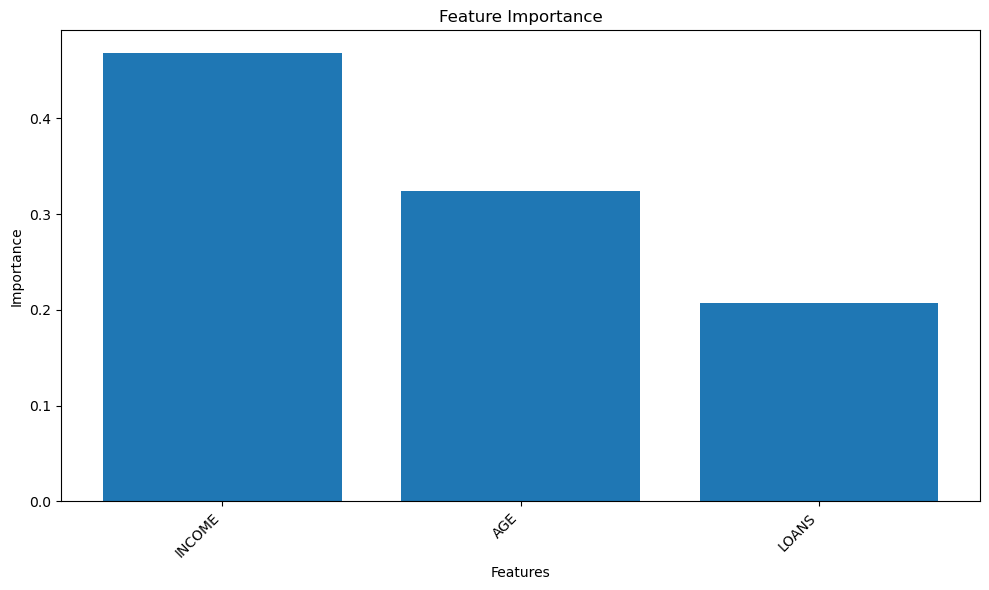

In [271]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)


feature_importances = gb_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()